In [70]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib
import platform

%matplotlib inline

# 日本語フォントの設定
def setup_japanese_font():
    """利用可能な日本語フォントを自動的に設定"""
    system = platform.system()
    
    # 利用可能なフォントを確認
    available_fonts = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
    
    # 優先順位に従ってフォントを設定
    font_candidates = []
    
    if system == 'Darwin':  # macOS
        font_candidates = ['Hiragino Sans', 'Hiragino Kaku Gothic ProN', 'Arial Unicode MS']
    elif system == 'Windows':
        font_candidates = ['MS Gothic', 'Yu Gothic', 'Meiryo']
    else:  # Linux
        font_candidates = ['Noto Sans CJK JP', 'IPAexGothic', 'IPAPGothic']
    
    # 利用可能なフォントを探す
    for font in font_candidates:
        if font in available_fonts:
            plt.rcParams['font.family'] = font
            print(f"日本語フォントを設定しました: {font}")
            return font
    
    # フォントが見つからない場合の警告
    print("警告: 日本語フォントが見つかりませんでした。日本語が正しく表示されない可能性があります。")
    print("利用可能なフォントの一部:", available_fonts[:10])
    return None

# 日本語フォントを設定
setup_japanese_font()

# マイナス記号の文字化けを防ぐ
plt.rcParams['axes.unicode_minus'] = False

# その他の設定
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 'large'})


日本語フォントを設定しました: Hiragino Sans


# Gamma分布とBeta分布のプロット関数

このノートブックでは、Gamma分布とBeta分布を理解するためのプロット関数を定義します。


## Gamma分布について
- **形状パラメータ（shape, α, k）**: 分布の形状を決定
- **スケールパラメータ（scale, θ）**: 分布のスケールを決定
- 平均 = shape × scale
- 分散 = shape × scale²

## Beta分布について
- **パラメータa（α）**: 形状パラメータ1
- **パラメータb（β）**: 形状パラメータ2
- 定義域: [0, 1]
- 平均 = a / (a + b)

In [71]:
def plot_gamma_distribution(shape, scale, x_max=10, num_points=1000, title=None):
    """
    Gamma分布の確率密度関数をプロットする関数
    
    Parameters:
    -----------
    shape : float
        Gamma分布の形状パラメータ（α, kとも呼ばれる）
    scale : float
        Gamma分布のスケールパラメータ（θとも呼ばれる）
    x_max : float
        プロットするxの最大値（デフォルト: 10）
    num_points : int
        プロットする点の数（デフォルト: 1000）
    title : str
        プロットのタイトル（Noneの場合は自動生成）
    """
    # x軸の値を生成
    x = np.linspace(0.01, x_max, num_points)
    
    # Gamma分布の確率密度関数を計算
    # scipy.stats.gammaでは、a=shape, scale=scale
    pdf = stats.gamma.pdf(x, a=shape, scale=scale)
    
    # プロット
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, pdf, 'b-', linewidth=2, label=f'Gamma({shape}, {scale})')
    ax.fill_between(x, pdf, alpha=0.3)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('Probability Density', fontsize=14)
    if title is None:
        ax.set_title(f'Gamma分布: shape={shape}, scale={scale}', fontsize=16)
    else:
        ax.set_title(title, fontsize=16)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # 統計情報を表示
    mean = shape * scale
    var = shape * scale ** 2
    print(f"平均: {mean:.4f}")
    print(f"分散: {var:.4f}")
    print(f"標準偏差: {np.sqrt(var):.4f}")


def plot_beta_distribution(a, b, num_points=1000, title=None):
    """
    Beta分布の確率密度関数をプロットする関数
    
    Parameters:
    -----------
    a : float
        Beta分布のパラメータα（形状パラメータ1）
    b : float
        Beta分布のパラメータβ（形状パラメータ2）
    num_points : int
        プロットする点の数（デフォルト: 1000）
    title : str
        プロットのタイトル（Noneの場合は自動生成）
    """
    # x軸の値を生成（Beta分布は[0,1]の範囲）
    x = np.linspace(0.001, 0.999, num_points)
    
    # Beta分布の確率密度関数を計算
    pdf = stats.beta.pdf(x, a=a, b=b)
    
    # プロット
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, pdf, 'r-', linewidth=2, label=f'Beta({a}, {b})')
    ax.fill_between(x, pdf, alpha=0.3)
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('Probability Density', fontsize=14)
    ax.set_xlim(0, 1)
    if title is None:
        ax.set_title(f'Beta分布: a={a}, b={b}', fontsize=16)
    else:
        ax.set_title(title, fontsize=16)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # 統計情報を表示
    mean = a / (a + b)
    var = (a * b) / ((a + b) ** 2 * (a + b + 1))
    print(f"平均: {mean:.4f}")
    print(f"分散: {var:.4f}")
    print(f"標準偏差: {np.sqrt(var):.4f}")

print("プロット関数の定義が完了しました。")


プロット関数の定義が完了しました。


# Gamma分布のプロット例

以下では、様々なパラメータのGamma分布をプロットします。
各セルでパラメータを設定してからプロットします。


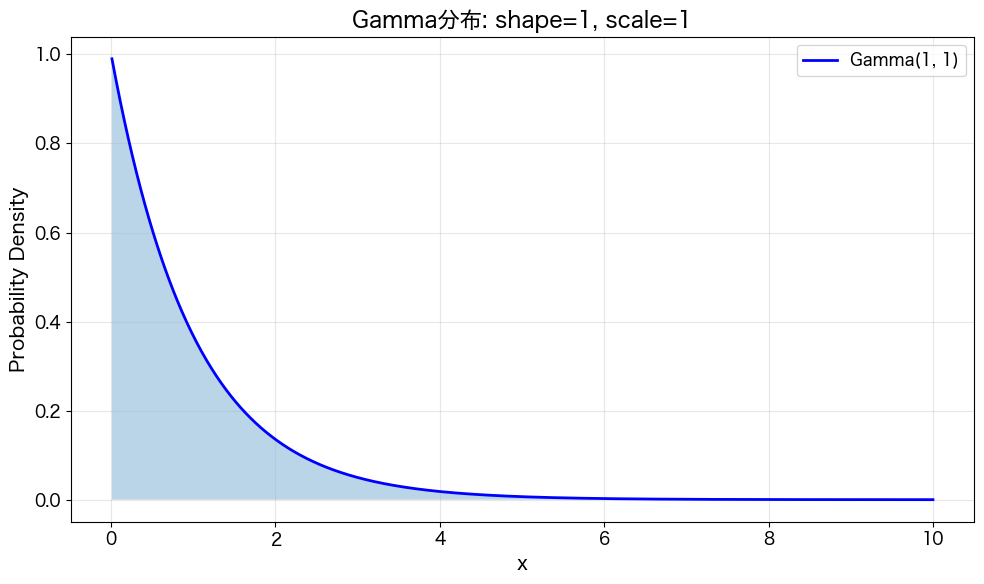

平均: 1.0000
分散: 1.0000
標準偏差: 1.0000


In [72]:
# パラメータ設定
shape = 1
scale = 1

# プロット
# 注意: Gamma(1, 1)は指数分布と等価です
plot_gamma_distribution(shape=shape, scale=scale, x_max=10)


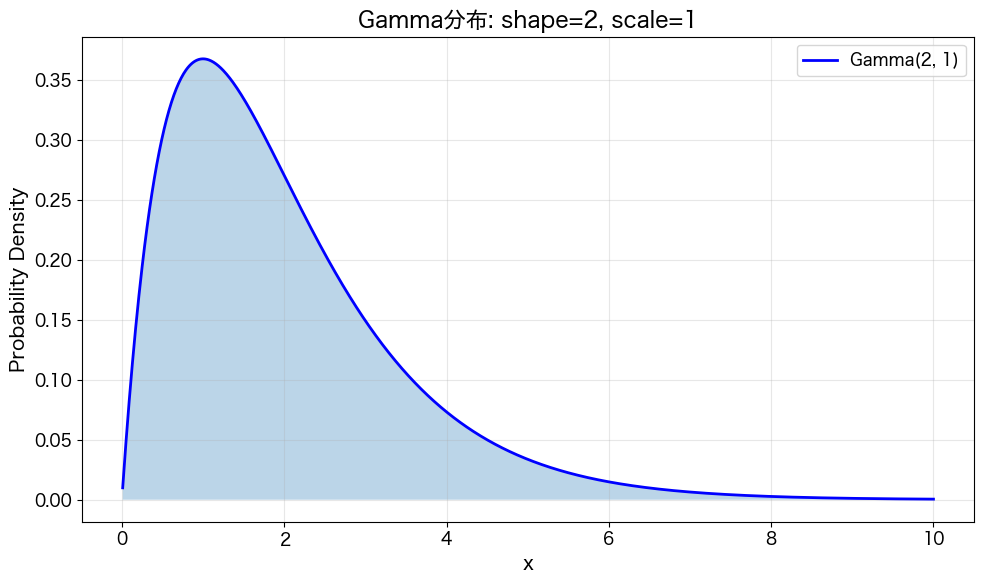

平均: 2.0000
分散: 2.0000
標準偏差: 1.4142


In [73]:
# パラメータ設定
shape = 2
scale = 1

# プロット
plot_gamma_distribution(shape=shape, scale=scale, x_max=10)


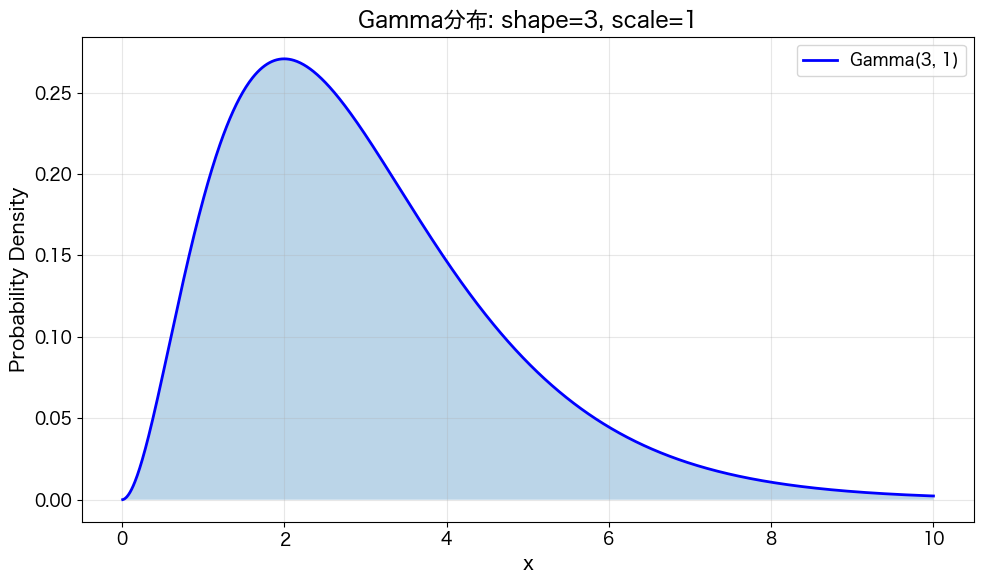

平均: 3.0000
分散: 3.0000
標準偏差: 1.7321


In [74]:
# パラメータ設定
shape = 3
scale = 1

# プロット
plot_gamma_distribution(shape=shape, scale=scale, x_max=10)


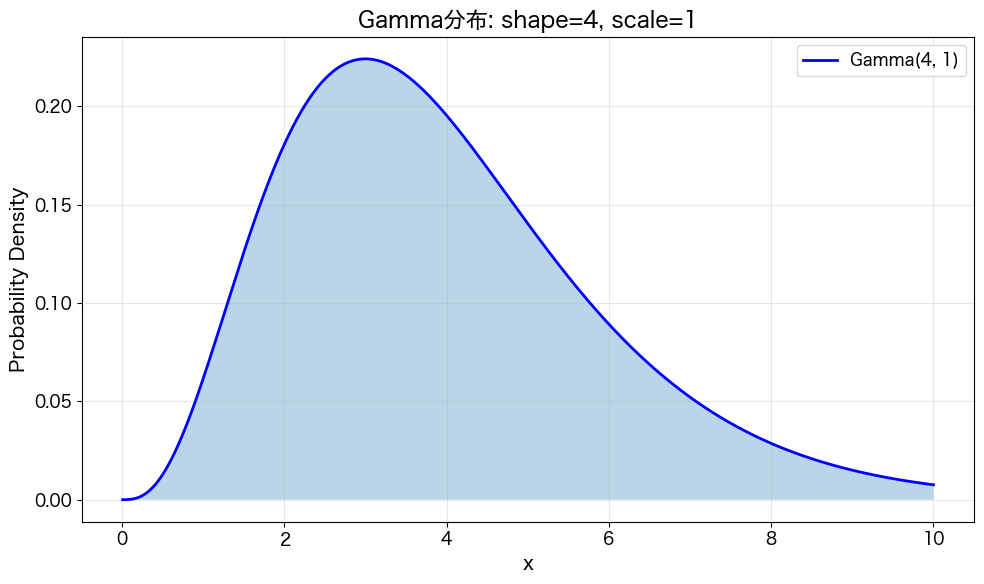

平均: 4.0000
分散: 4.0000
標準偏差: 2.0000


In [75]:
# パラメータ設定
shape = 4
scale = 1

# プロット
plot_gamma_distribution(shape=shape, scale=scale, x_max=10)


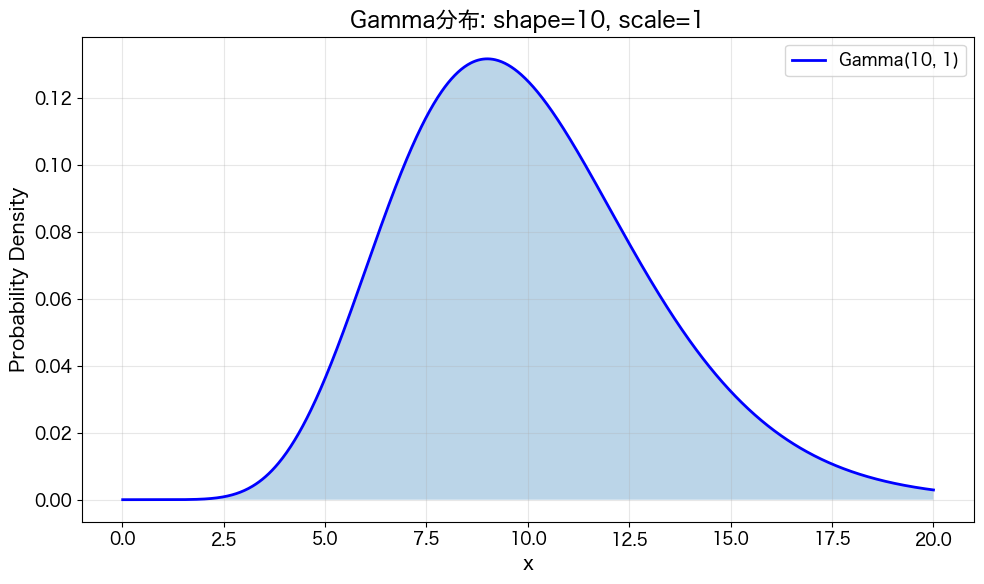

平均: 10.0000
分散: 10.0000
標準偏差: 3.1623


In [76]:
# パラメータ設定
shape = 10
scale = 1

# プロット
plot_gamma_distribution(shape=shape, scale=scale, x_max=20)


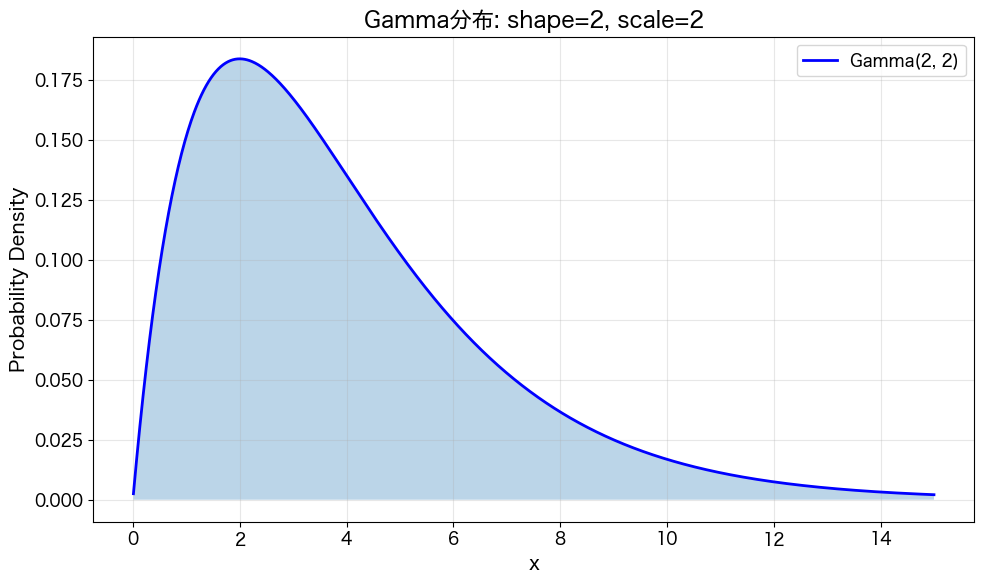

平均: 4.0000
分散: 8.0000
標準偏差: 2.8284


In [77]:
# パラメータ設定
shape = 2
scale = 2

# プロット（スケールパラメータを変更した場合）
plot_gamma_distribution(shape=shape, scale=scale, x_max=15)


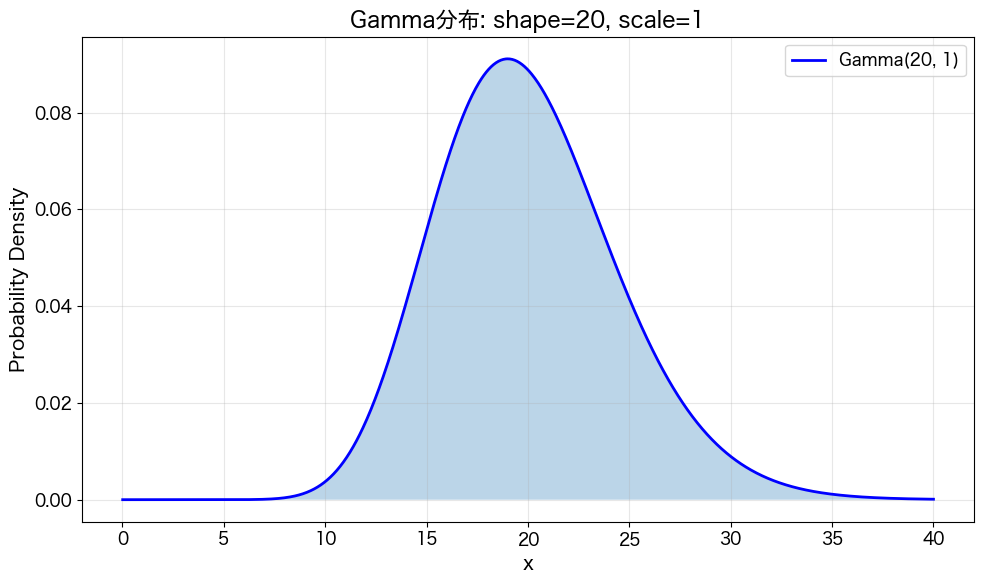

平均: 20.0000
分散: 20.0000
標準偏差: 4.4721


In [78]:
# パラメータ設定
shape = 20
scale = 1

# プロット（スケールパラメータを変更した場合）
plot_gamma_distribution(shape=shape, scale=scale, x_max=40)

# Beta分布のプロット例

以下では、様々なパラメータのBeta分布をプロットします。
各セルでパラメータを設定してからプロットします。


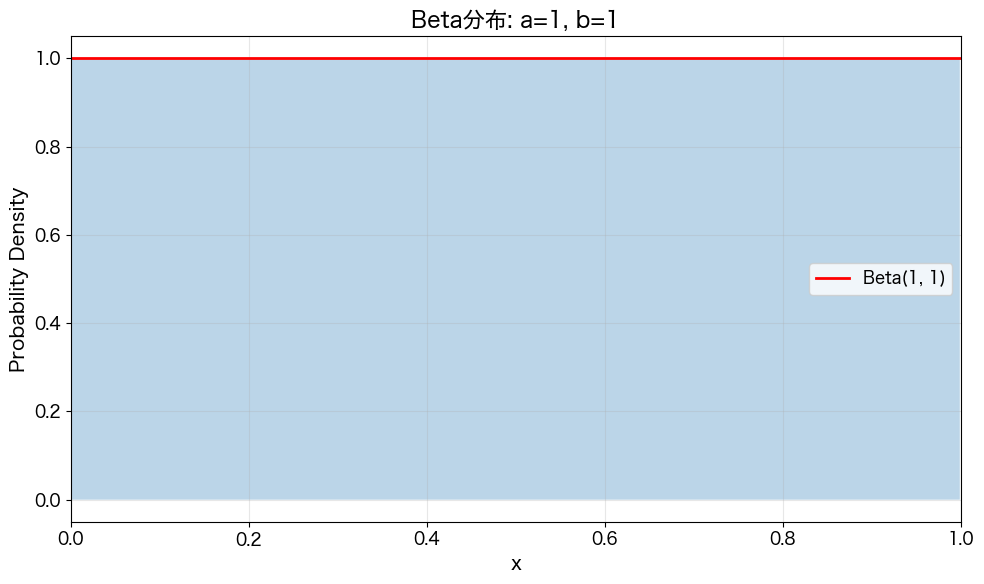

平均: 0.5000
分散: 0.0833
標準偏差: 0.2887


In [79]:
# パラメータ設定
a = 1
b = 1

# プロット
# 注意: Beta(1, 1)は一様分布[0,1]と等価です
plot_beta_distribution(a=a, b=b)


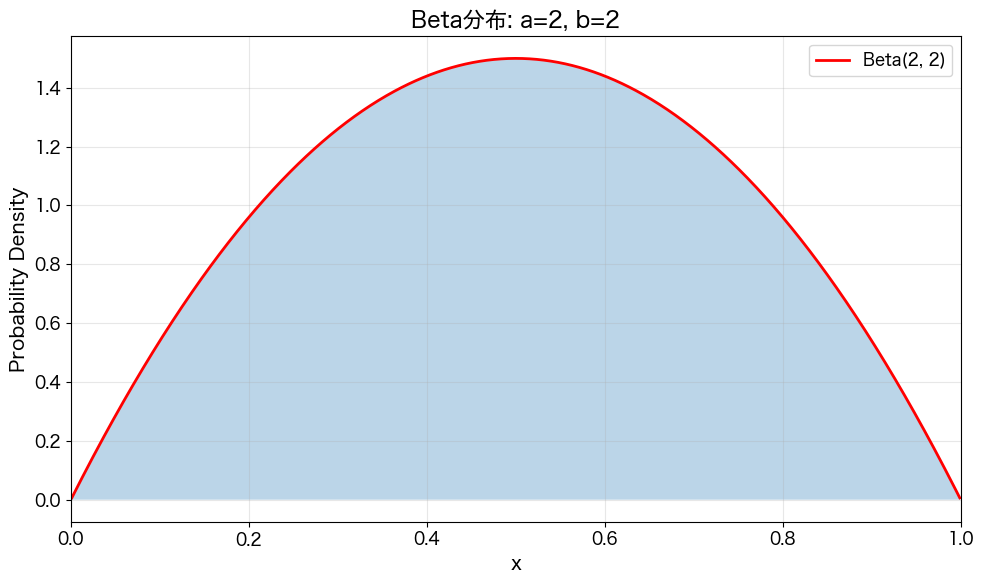

平均: 0.5000
分散: 0.0500
標準偏差: 0.2236


In [80]:
# パラメータ設定
a = 2
b = 2

# プロット
plot_beta_distribution(a=a, b=b)


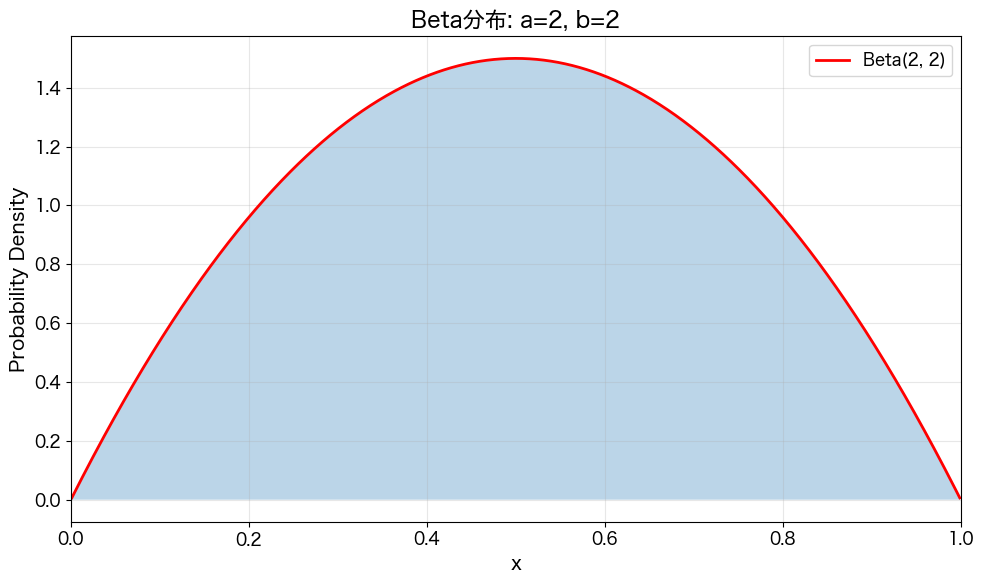

平均: 0.5000
分散: 0.0500
標準偏差: 0.2236


In [81]:
# パラメータ設定
a = 2
b = 2

# プロット
plot_beta_distribution(a=a, b=b)


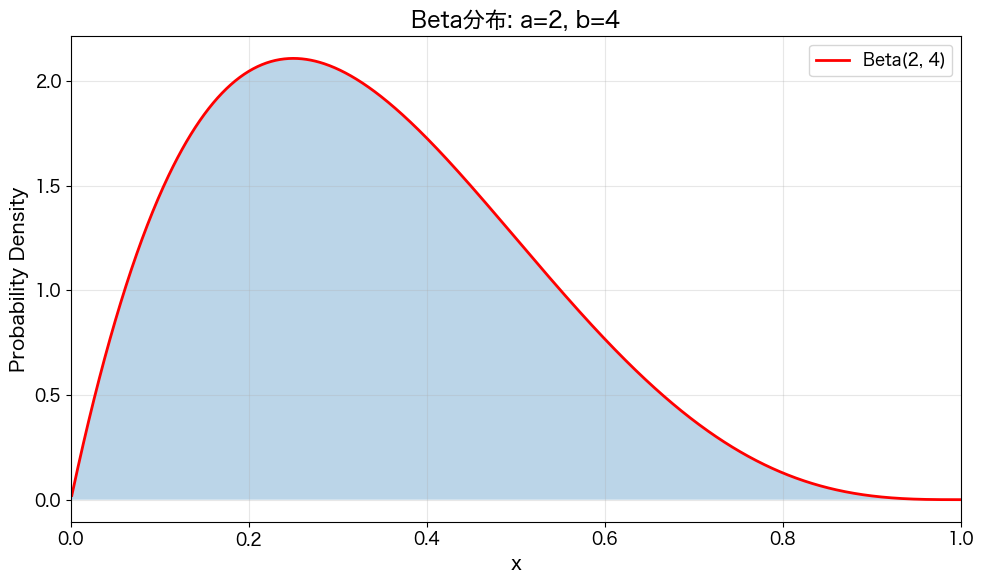

平均: 0.3333
分散: 0.0317
標準偏差: 0.1782


In [82]:
# パラメータ設定
a = 2
b = 4

# プロット（非対称な分布）
plot_beta_distribution(a=a, b=b)


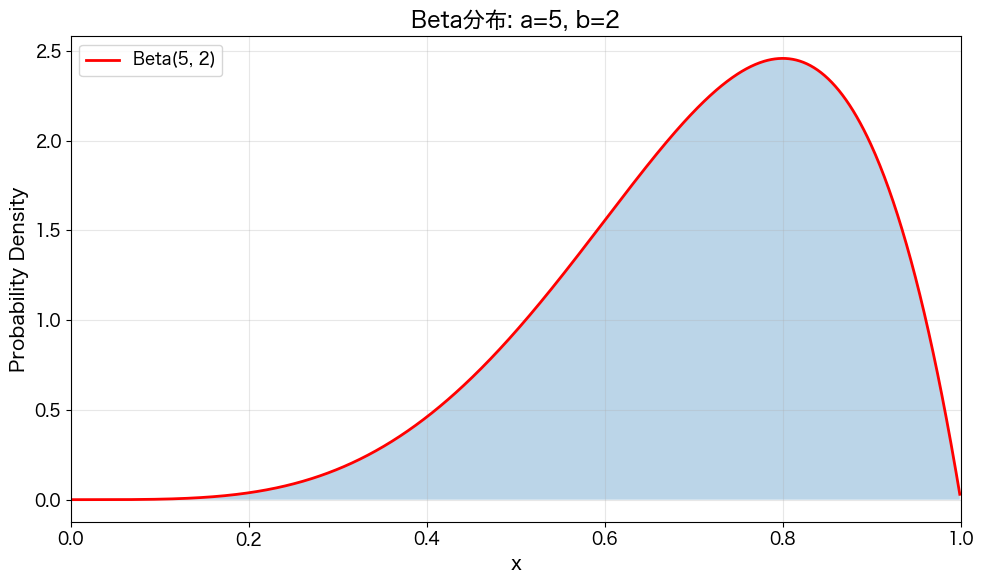

平均: 0.7143
分散: 0.0255
標準偏差: 0.1597


In [83]:
# パラメータ設定
a = 5
b = 2

# プロット（Beta(2,5)の逆、右に偏った分布）
plot_beta_distribution(a=a, b=b)


# 2次元分布の等高線可視化

2つの確率変数がそれぞれ異なる分布に従う場合の同時分布を、等高線として平面に可視化します。
例えば、v1とv2がそれぞれBeta分布に従う場合の同時確率密度を可視化できます。


In [84]:
def plot_2d_joint_contour(pdf1_func=None, pdf2_func=None, 
                          dist1_type=None, dist1_params=None,
                          dist2_type=None, dist2_params=None,
                          x_range=(0, 1), y_range=(0, 1), 
                          resolution=200, num_contours=20, 
                          x_label='v₁', y_label='v₂',
                          title=None, show_stats=True):
    """
    一般的な2次元同時確率密度を等高線として可視化する関数（独立分布用）
    
    この関数は2つの方法で使用できます：
    1. カスタムPDF関数を直接渡す方法
    2. 分布タイプとパラメータを指定する方法（scipy.statsの分布を使用）
    
    注意: この関数は独立な分布を仮定しています（同時密度 = 各密度の積）。
    相関のある分布の場合は、plot_2d_correlated_contourを使用してください。
    
    Parameters:
    -----------
    pdf1_func : callable, optional
        第1変数の確率密度関数。X（2次元配列）を受け取り、PDF値を返す関数。
        Noneの場合はdist1_typeとdist1_paramsを使用
    pdf2_func : callable, optional
        第2変数の確率密度関数。Y（2次元配列）を受け取り、PDF値を返す関数。
        Noneの場合はdist2_typeとdist2_paramsを使用
    dist1_type : str, optional
        第1変数の分布タイプ。サポート: 'beta', 'gamma', 'uniform', 'normal', 'expon'
    dist1_params : tuple, optional
        第1変数の分布パラメータ
        - Beta: (a, b)
        - Gamma: (shape, scale)
        - Uniform: (low, high)
        - Normal: (mean, std)
        - Exponential: (scale,)
    dist2_type : str, optional
        第2変数の分布タイプ
    dist2_params : tuple, optional
        第2変数の分布パラメータ
    x_range : tuple
        x軸の範囲（デフォルト: (0, 1)）
    y_range : tuple
        y軸の範囲（デフォルト: (0, 1)）
    resolution : int
        グリッドの解像度（デフォルト: 200）
    num_contours : int
        等高線の数（デフォルト: 20）
    x_label : str
        x軸のラベル（デフォルト: 'v₁'）
    y_label : str
        y軸のラベル（デフォルト: 'v₂'）
    title : str
        プロットのタイトル（Noneの場合は自動生成）
    show_stats : bool
        統計情報を表示するか（デフォルト: True）
    """
    # グリッドを生成
    x = np.linspace(x_range[0] + 0.001, x_range[1] - 0.001, resolution)
    y = np.linspace(y_range[0] + 0.001, y_range[1] - 0.001, resolution)
    X, Y = np.meshgrid(x, y)
    
    # PDF関数を取得または生成
    if pdf1_func is None:
        if dist1_type is None or dist1_params is None:
            raise ValueError("pdf1_funcまたは(dist1_type, dist1_params)を指定してください")
        pdf1_func = _get_pdf_function(dist1_type, dist1_params)
        dist1_name = f"{dist1_type.capitalize()}{dist1_params}"
    else:
        dist1_name = "Custom PDF"
    
    if pdf2_func is None:
        if dist2_type is None or dist2_params is None:
            raise ValueError("pdf2_funcまたは(dist2_type, dist2_params)を指定してください")
        pdf2_func = _get_pdf_function(dist2_type, dist2_params)
        dist2_name = f"{dist2_type.capitalize()}{dist2_params}"
    else:
        dist2_name = "Custom PDF"
    
    # 各点での確率密度を計算（独立な場合、同時密度は各密度の積）
    pdf1 = pdf1_func(X)
    pdf2 = pdf2_func(Y)
    joint_pdf = pdf1 * pdf2
    
    # プロット
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # 等高線プロット
    contours = ax.contour(X, Y, joint_pdf, levels=num_contours, cmap='viridis', linewidths=0.8)
    ax.clabel(contours, inline=True, fontsize=8)
    
    # カラーマップで塗りつぶし
    im = ax.contourf(X, Y, joint_pdf, levels=num_contours, cmap='viridis', alpha=0.6)
    
    # カラーバーを追加
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Joint Probability Density', fontsize=12)
    
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.set_xlim(x_range[0], x_range[1])
    ax.set_ylim(y_range[0], y_range[1])
    ax.set_aspect('equal')
    
    if title is None:
        ax.set_title(f'同時確率密度（独立）: {x_label}~{dist1_name}, {y_label}~{dist2_name}', fontsize=16)
    else:
        ax.set_title(title, fontsize=16)
    
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 統計情報を表示
    if show_stats and dist1_type is not None and dist2_type is not None:
        stats1 = _get_distribution_stats(dist1_type, dist1_params)
        stats2 = _get_distribution_stats(dist2_type, dist2_params)
        if stats1:
            print(f"{x_label} ~ {dist1_name}: {stats1}")
        if stats2:
            print(f"{y_label} ~ {dist2_name}: {stats2}")


def plot_2d_correlated_contour(joint_pdf_func=None,
                               dist_type='multivariate_normal',
                               dist_params=None,
                               x_range=(0, 1), y_range=(0, 1), 
                               resolution=200, num_contours=20, 
                               x_label='v₁', y_label='v₂',
                               title=None, show_stats=True):
    """
    相関のある2次元同時確率密度を等高線として可視化する関数
    
    この関数は相関のある分布の同時確率密度を直接プロットします。
    
    Parameters:
    -----------
    joint_pdf_func : callable, optional
        同時確率密度関数。X, Y（2次元配列）を受け取り、同時PDF値を返す関数。
        joint_pdf_func(X, Y)の形式で呼び出されます。
        Noneの場合はdist_typeとdist_paramsを使用
    dist_type : str, optional
        分布タイプ。現在サポート: 'multivariate_normal'
        'multivariate_normal': 2変量正規分布（相関あり）
    dist_params : dict, optional
        分布パラメータ
        - multivariate_normal: {
            'mean': [mean1, mean2],  # 平均ベクトル
            'cov': [[var1, cov12], [cov21, var2]]  # 共分散行列
            または
            'mean': [mean1, mean2],
            'std': [std1, std2],  # 標準偏差
            'corr': corr  # 相関係数（-1から1）
          }
    x_range : tuple
        x軸の範囲（デフォルト: (0, 1)）
    y_range : tuple
        y軸の範囲（デフォルト: (0, 1)）
    resolution : int
        グリッドの解像度（デフォルト: 200）
    num_contours : int
        等高線の数（デフォルト: 20）
    x_label : str
        x軸のラベル（デフォルト: 'v₁'）
    y_label : str
        y軸のラベル（デフォルト: 'v₂'）
    title : str
        プロットのタイトル（Noneの場合は自動生成）
    show_stats : bool
        統計情報を表示するか（デフォルト: True）
    """
    # グリッドを生成
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    
    # 同時PDF関数を取得または生成
    if joint_pdf_func is None:
        if dist_type is None or dist_params is None:
            raise ValueError("joint_pdf_funcまたは(dist_type, dist_params)を指定してください")
        joint_pdf_func = _get_joint_pdf_function(dist_type, dist_params)
        dist_name = f"{dist_type}"
    else:
        dist_name = "Custom Joint PDF"
    
    # 各点での同時確率密度を計算
    # グリッドの各点を結合して計算
    points = np.stack([X.ravel(), Y.ravel()], axis=1)
    joint_pdf_flat = joint_pdf_func(points)
    joint_pdf = joint_pdf_flat.reshape(X.shape)
    
    # プロット
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # 等高線プロット
    contours = ax.contour(X, Y, joint_pdf, levels=num_contours, cmap='viridis', linewidths=0.8)
    ax.clabel(contours, inline=True, fontsize=8)
    
    # カラーマップで塗りつぶし
    im = ax.contourf(X, Y, joint_pdf, levels=num_contours, cmap='viridis', alpha=0.6)
    
    # カラーバーを追加
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Joint Probability Density', fontsize=12)
    
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.set_xlim(x_range[0], x_range[1])
    ax.set_ylim(y_range[0], y_range[1])
    ax.set_aspect('equal')
    
    if title is None:
        if dist_type == 'multivariate_normal' and dist_params is not None:
            if 'corr' in dist_params:
                corr = dist_params['corr']
                ax.set_title(f'相関のある同時確率密度（相関係数={corr:.2f}）', fontsize=16)
            else:
                ax.set_title(f'相関のある同時確率密度: {dist_name}', fontsize=16)
        else:
            ax.set_title(f'相関のある同時確率密度: {dist_name}', fontsize=16)
    else:
        ax.set_title(title, fontsize=16)
    
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 統計情報を表示
    if show_stats and dist_type == 'multivariate_normal' and dist_params is not None:
        mean = dist_params.get('mean', [0, 0])
        if 'cov' in dist_params:
            cov = dist_params['cov']
            var1 = cov[0][0]
            var2 = cov[1][1]
            cov12 = cov[0][1]
            std1 = np.sqrt(var1)
            std2 = np.sqrt(var2)
            corr = cov12 / (std1 * std2) if std1 * std2 > 0 else 0
        elif 'std' in dist_params and 'corr' in dist_params:
            std1, std2 = dist_params['std']
            corr = dist_params['corr']
            var1 = std1 ** 2
            var2 = std2 ** 2
        else:
            std1 = std2 = 1
            corr = 0
            var1 = var2 = 1
        
        print(f"平均: [{mean[0]:.4f}, {mean[1]:.4f}]")
        print(f"標準偏差: [{std1:.4f}, {std2:.4f}]")
        print(f"相関係数: {corr:.4f}")


def _get_joint_pdf_function(dist_type, params):
    """
    分布タイプとパラメータから同時PDF関数を生成する内部関数
    """
    if dist_type == 'multivariate_normal':
        mean = np.array(params.get('mean', [0, 0]))
        
        # 共分散行列を構築
        if 'cov' in params:
            cov = np.array(params['cov'])
        elif 'std' in params and 'corr' in params:
            std1, std2 = params['std']
            corr = params['corr']
            cov = np.array([
                [std1**2, corr * std1 * std2],
                [corr * std1 * std2, std2**2]
            ])
        else:
            raise ValueError("multivariate_normalには'cov'または('std', 'corr')が必要です")
        
        # 多変量正規分布のオブジェクトを作成
        mvn = stats.multivariate_normal(mean=mean, cov=cov)
        
        # PDF関数を返す
        return lambda points: mvn.pdf(points)
    else:
        raise ValueError(f"サポートされていない分布タイプ: {dist_type}")


def _get_pdf_function(dist_type, params):
    """
    分布タイプとパラメータからPDF関数を生成する内部関数
    """
    if dist_type == 'beta':
        a, b = params
        return lambda x: stats.beta.pdf(x, a=a, b=b)
    elif dist_type == 'gamma':
        shape, scale = params
        return lambda x: stats.gamma.pdf(x, a=shape, scale=scale)
    elif dist_type == 'uniform':
        low, high = params
        return lambda x: stats.uniform.pdf(x, loc=low, scale=high-low)
    elif dist_type == 'normal':
        mean, std = params
        return lambda x: stats.norm.pdf(x, loc=mean, scale=std)
    elif dist_type == 'expon':
        scale = params[0]
        return lambda x: stats.expon.pdf(x, scale=scale)
    else:
        raise ValueError(f"サポートされていない分布タイプ: {dist_type}")


def _get_distribution_stats(dist_type, params):
    """
    分布の統計情報を取得する内部関数
    """
    if dist_type == 'beta':
        a, b = params
        mean = a / (a + b)
        var = (a * b) / ((a + b) ** 2 * (a + b + 1))
        return f"平均={mean:.4f}, 分散={var:.4f}"
    elif dist_type == 'gamma':
        shape, scale = params
        mean = shape * scale
        var = shape * scale ** 2
        return f"平均={mean:.4f}, 分散={var:.4f}"
    elif dist_type == 'uniform':
        low, high = params
        mean = (low + high) / 2
        var = ((high - low) ** 2) / 12
        return f"平均={mean:.4f}, 分散={var:.4f}"
    elif dist_type == 'normal':
        mean, std = params
        var = std ** 2
        return f"平均={mean:.4f}, 分散={var:.4f}"
    elif dist_type == 'expon':
        scale = params[0]
        mean = scale
        var = scale ** 2
        return f"平均={mean:.4f}, 分散={var:.4f}"
    else:
        return None


# 後方互換性のための便利関数
def plot_2d_beta_contour(a1, b1, a2, b2, resolution=200, num_contours=20, title=None):
    """Beta分布の等高線可視化（後方互換性のため）"""
    plot_2d_joint_contour(
        dist1_type='beta', dist1_params=(a1, b1),
        dist2_type='beta', dist2_params=(a2, b2),
        x_range=(0, 1), y_range=(0, 1),
        resolution=resolution, num_contours=num_contours,
        x_label='v₁ (Beta分布)', y_label='v₂ (Beta分布)',
        title=title
    )


def plot_2d_gamma_contour(shape1, scale1, shape2, scale2, x_max=10, y_max=10, 
                          resolution=200, num_contours=20, title=None):
    """Gamma分布の等高線可視化（後方互換性のため）"""
    plot_2d_joint_contour(
        dist1_type='gamma', dist1_params=(shape1, scale1),
        dist2_type='gamma', dist2_params=(shape2, scale2),
        x_range=(0, x_max), y_range=(0, y_max),
        resolution=resolution, num_contours=num_contours,
        x_label='v₁ (Gamma分布)', y_label='v₂ (Gamma分布)',
        title=title
    )


def plot_2d_mixed_contour(dist1_params, dist1_type, dist2_params, dist2_type,
                          x_range=(0, 1), y_range=(0, 1), resolution=200, 
                          num_contours=20, title=None):
    """混合分布の等高線可視化（後方互換性のため）"""
    plot_2d_joint_contour(
        dist1_type=dist1_type, dist1_params=dist1_params,
        dist2_type=dist2_type, dist2_params=dist2_params,
        x_range=x_range, y_range=y_range,
        resolution=resolution, num_contours=num_contours,
        title=title
    )


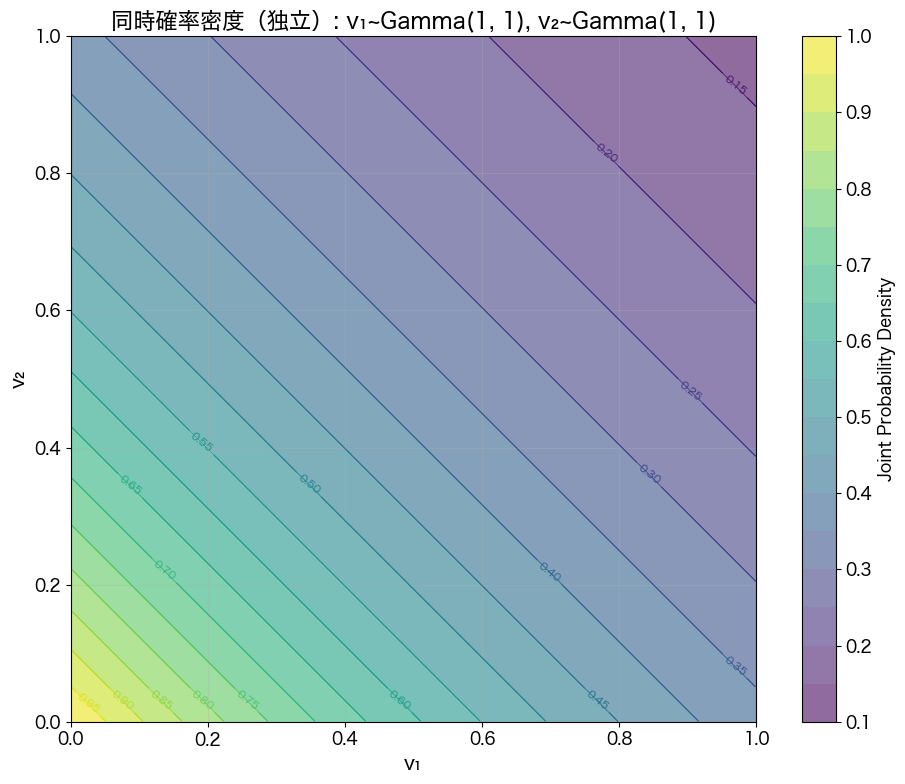

v₁ ~ Gamma(1, 1): 平均=1.0000, 分散=1.0000
v₂ ~ Gamma(1, 1): 平均=1.0000, 分散=1.0000


In [85]:
plot_2d_joint_contour(
    dist1_type='gamma', dist1_params=(1, 1),
    dist2_type='gamma', dist2_params=(1, 1),
    x_range=(0, 1), y_range=(0, 1)
)

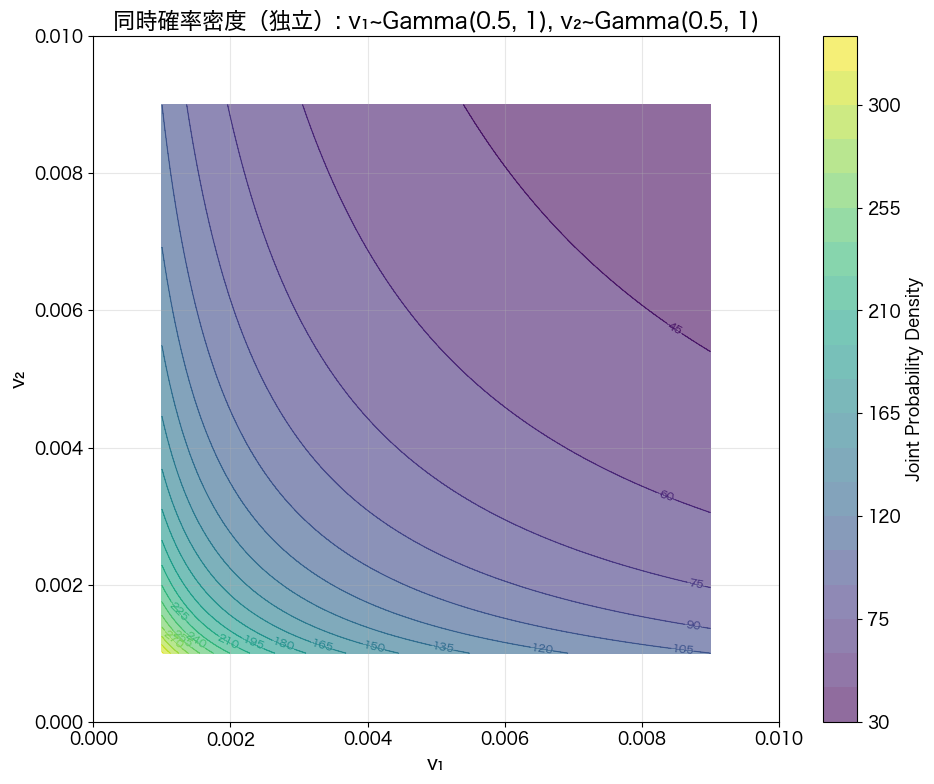

v₁ ~ Gamma(0.5, 1): 平均=0.5000, 分散=0.5000
v₂ ~ Gamma(0.5, 1): 平均=0.5000, 分散=0.5000


In [86]:
plot_2d_joint_contour(
    dist1_type='gamma', dist1_params=(0.5, 1),
    dist2_type='gamma', dist2_params=(0.5, 1),
    x_range=(0, 0.01), y_range=(0, 0.01)
)

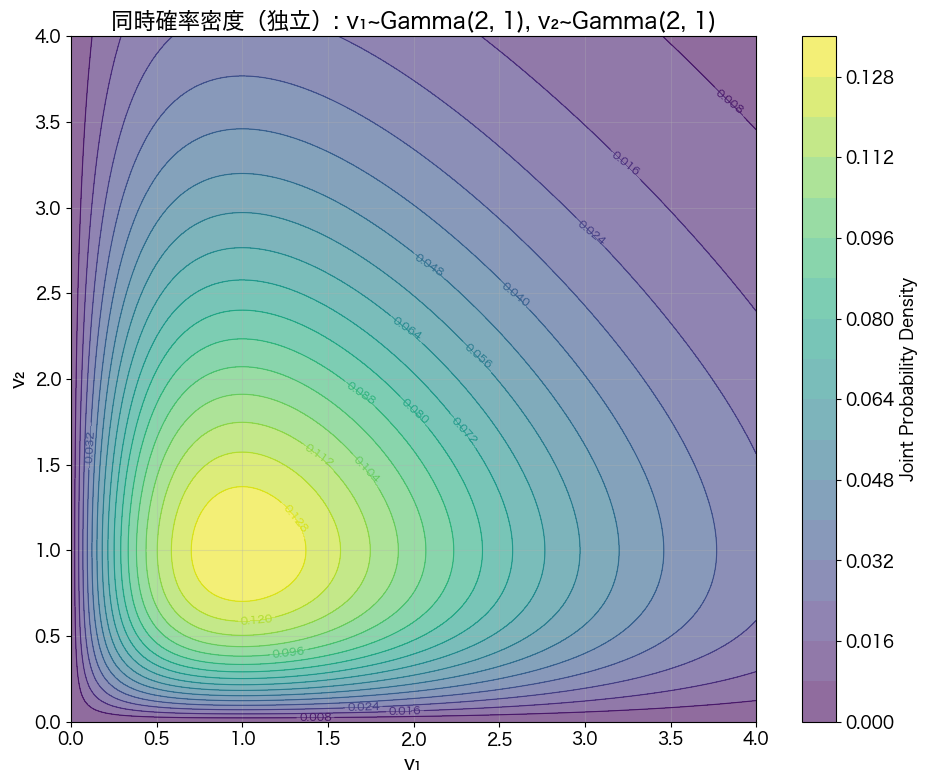

v₁ ~ Gamma(2, 1): 平均=2.0000, 分散=2.0000
v₂ ~ Gamma(2, 1): 平均=2.0000, 分散=2.0000


In [87]:
plot_2d_joint_contour(
    dist1_type='gamma', dist1_params=(2, 1),
    dist2_type='gamma', dist2_params=(2, 1),
    x_range=(0, 4), y_range=(0, 4)
)

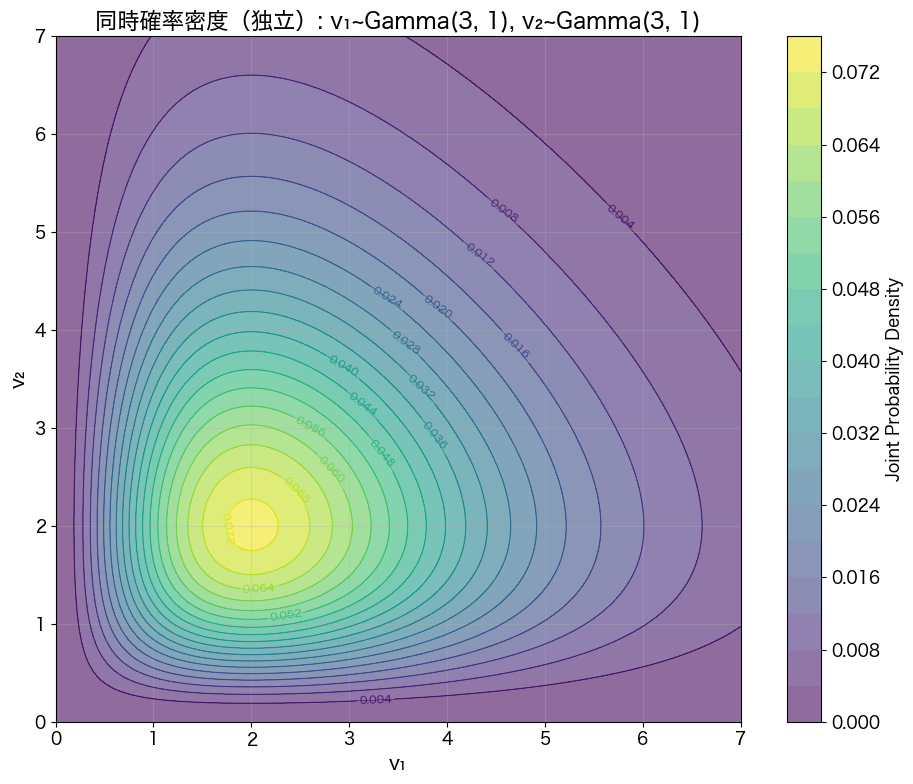

v₁ ~ Gamma(3, 1): 平均=3.0000, 分散=3.0000
v₂ ~ Gamma(3, 1): 平均=3.0000, 分散=3.0000


In [88]:
plot_2d_joint_contour(
    dist1_type='gamma', dist1_params=(3, 1),
    dist2_type='gamma', dist2_params=(3, 1),
    x_range=(0, 7), y_range=(0, 7)
)

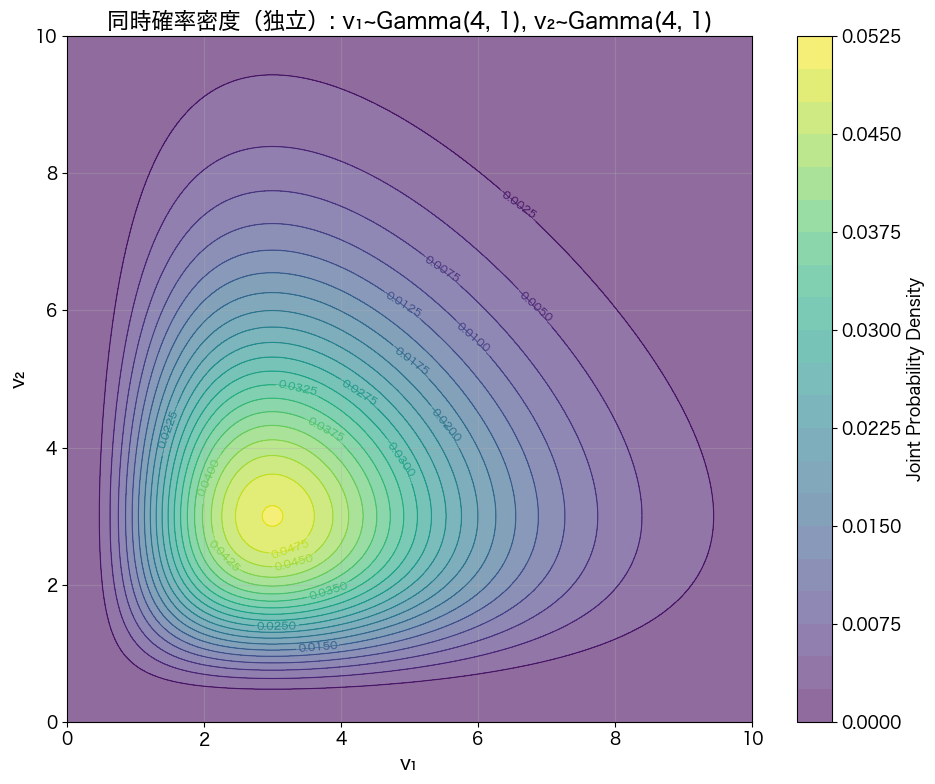

v₁ ~ Gamma(4, 1): 平均=4.0000, 分散=4.0000
v₂ ~ Gamma(4, 1): 平均=4.0000, 分散=4.0000


In [89]:
plot_2d_joint_contour(
    dist1_type='gamma', dist1_params=(4, 1),
    dist2_type='gamma', dist2_params=(4, 1),
    x_range=(0, 10), y_range=(0, 10)
)

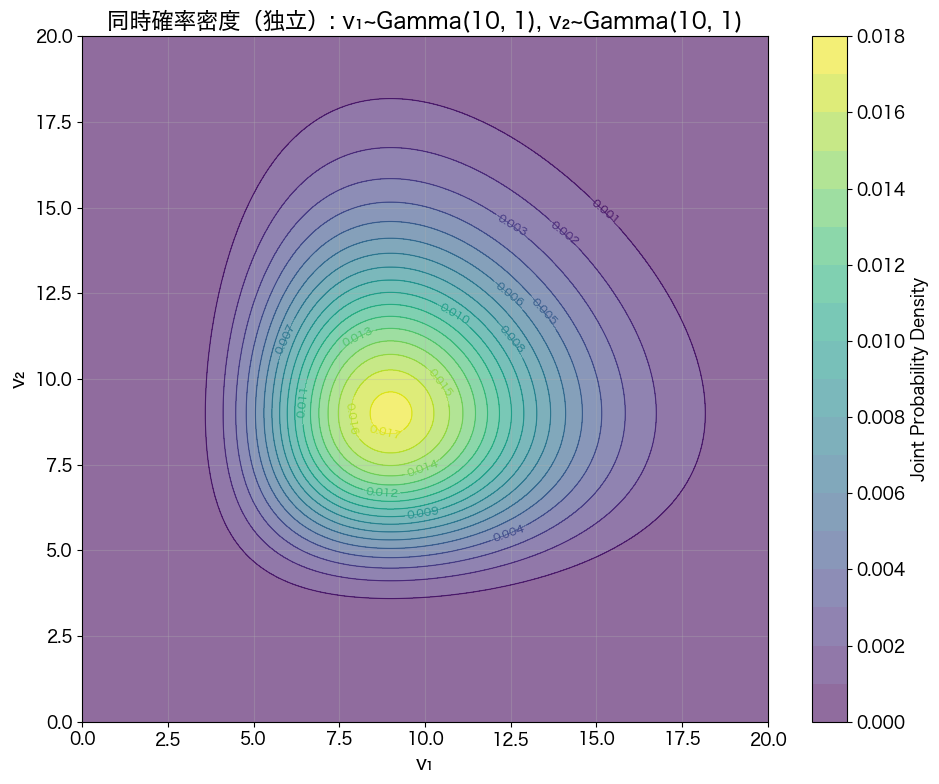

v₁ ~ Gamma(10, 1): 平均=10.0000, 分散=10.0000
v₂ ~ Gamma(10, 1): 平均=10.0000, 分散=10.0000


In [90]:
plot_2d_joint_contour(
    dist1_type='gamma', dist1_params=(10, 1),
    dist2_type='gamma', dist2_params=(10, 1),
    x_range=(0, 20), y_range=(0, 20)
)

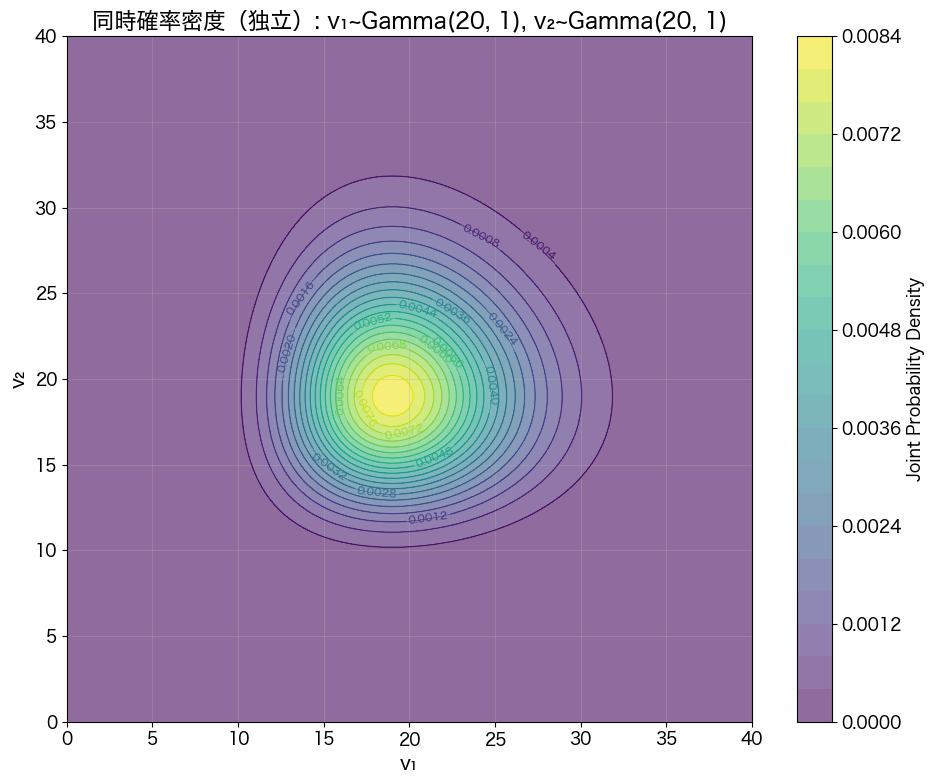

v₁ ~ Gamma(20, 1): 平均=20.0000, 分散=20.0000
v₂ ~ Gamma(20, 1): 平均=20.0000, 分散=20.0000


In [91]:
plot_2d_joint_contour(
    dist1_type='gamma', dist1_params=(20, 1),
    dist2_type='gamma', dist2_params=(20, 1),
    x_range=(0, 40), y_range=(0, 40)
)

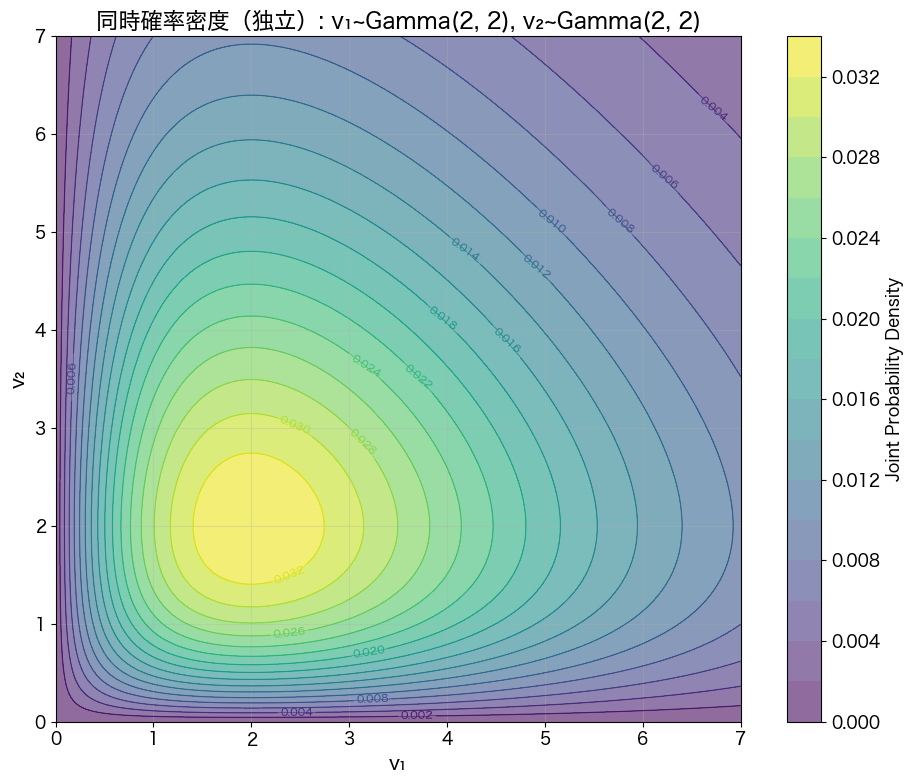

v₁ ~ Gamma(2, 2): 平均=4.0000, 分散=8.0000
v₂ ~ Gamma(2, 2): 平均=4.0000, 分散=8.0000


In [92]:
plot_2d_joint_contour(
    dist1_type='gamma', dist1_params=(2, 2),
    dist2_type='gamma', dist2_params=(2, 2),
    x_range=(0, 7), y_range=(0, 7)
)

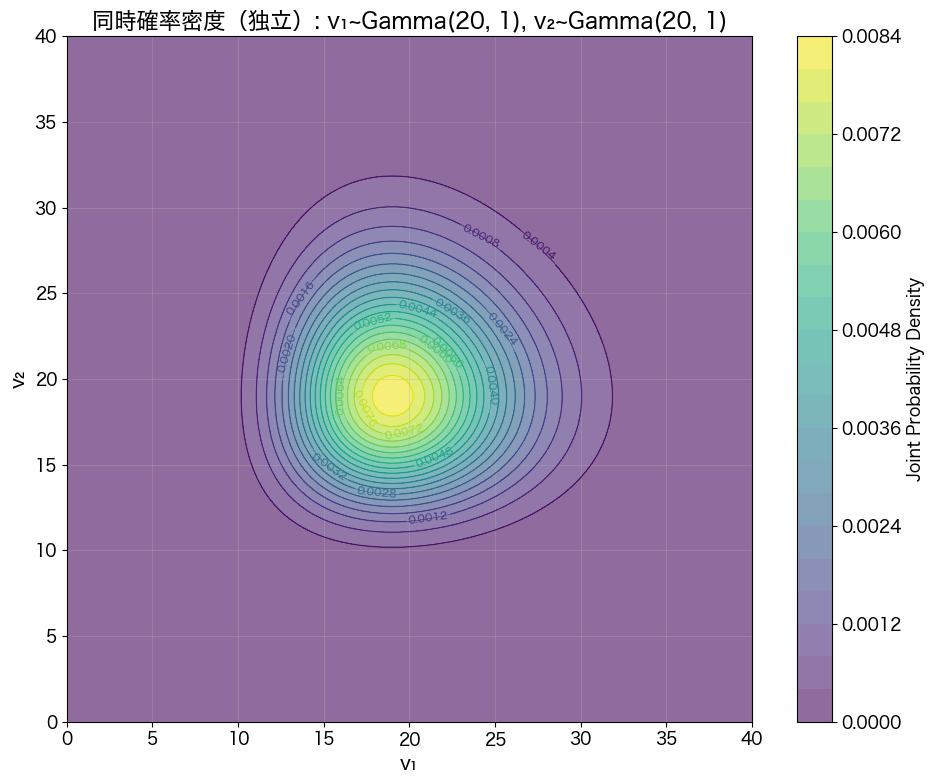

v₁ ~ Gamma(20, 1): 平均=20.0000, 分散=20.0000
v₂ ~ Gamma(20, 1): 平均=20.0000, 分散=20.0000


In [93]:
plot_2d_joint_contour(
    dist1_type='gamma', dist1_params=(20, 1),
    dist2_type='gamma', dist2_params=(20, 1),
    x_range=(0, 40), y_range=(0, 40)
)

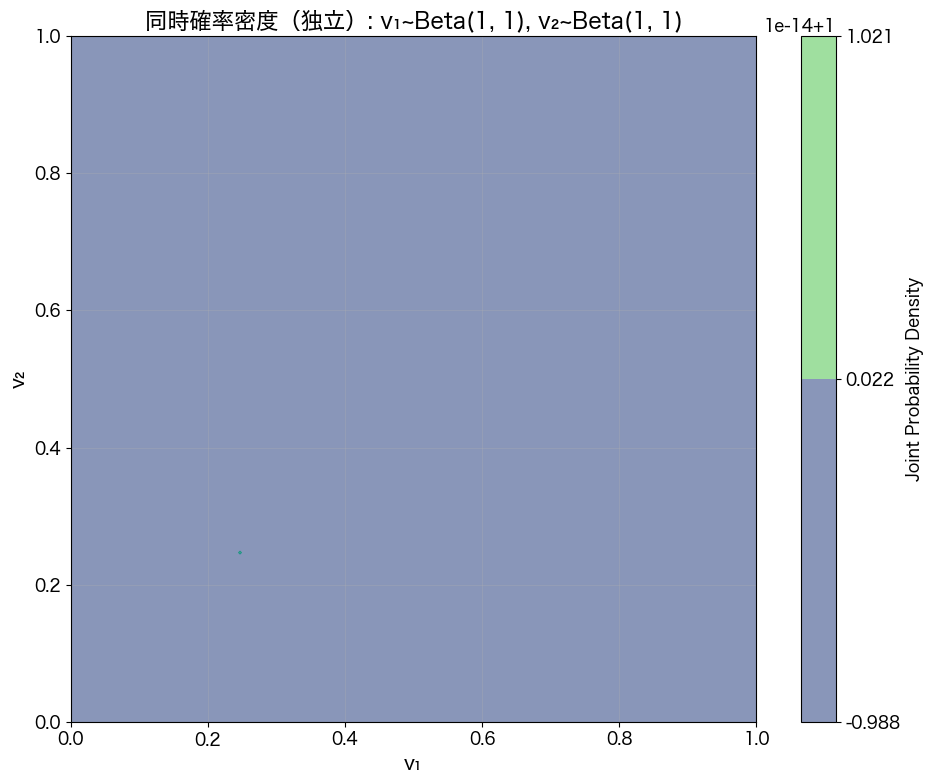

v₁ ~ Beta(1, 1): 平均=0.5000, 分散=0.0833
v₂ ~ Beta(1, 1): 平均=0.5000, 分散=0.0833


In [94]:
plot_2d_joint_contour(
    dist1_type='beta', dist1_params=(1, 1),
    dist2_type='beta', dist2_params=(1, 1),
    x_range=(0, 1), y_range=(0, 1)
)

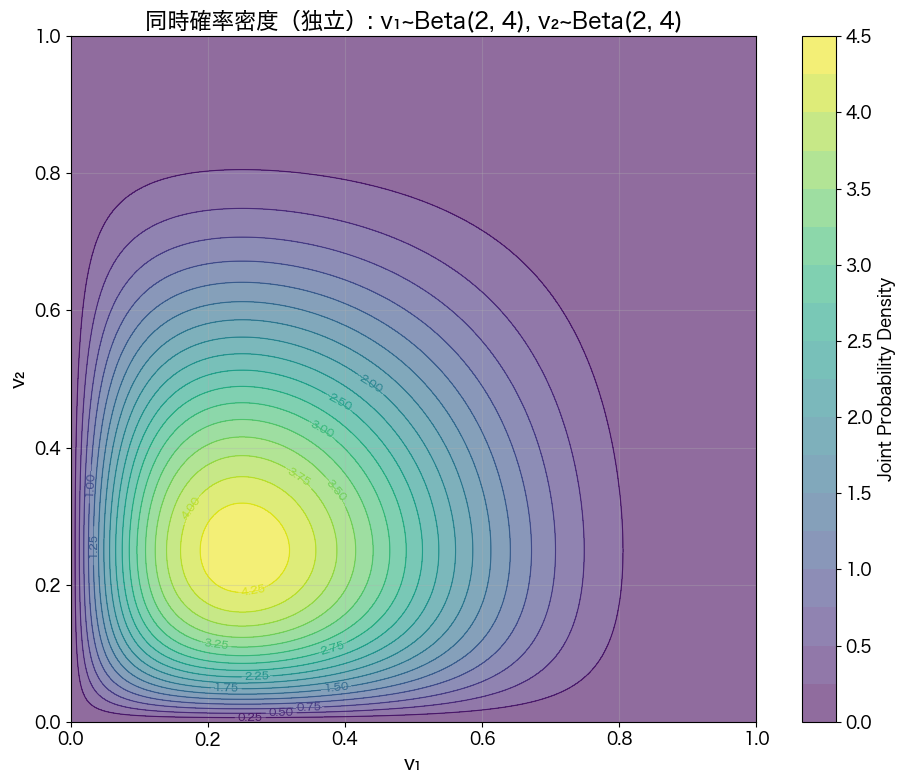

v₁ ~ Beta(2, 4): 平均=0.3333, 分散=0.0317
v₂ ~ Beta(2, 4): 平均=0.3333, 分散=0.0317


In [95]:
plot_2d_joint_contour(
    dist1_type='beta', dist1_params=(2, 4),
    dist2_type='beta', dist2_params=(2, 4),
    x_range=(0, 1), y_range=(0, 1)
)


# 相関のある分布の同時確率密度可視化

2つの確率変数が相関している場合の同時分布を可視化します。
例えば、2変量正規分布など、相関のある分布を扱うことができます。


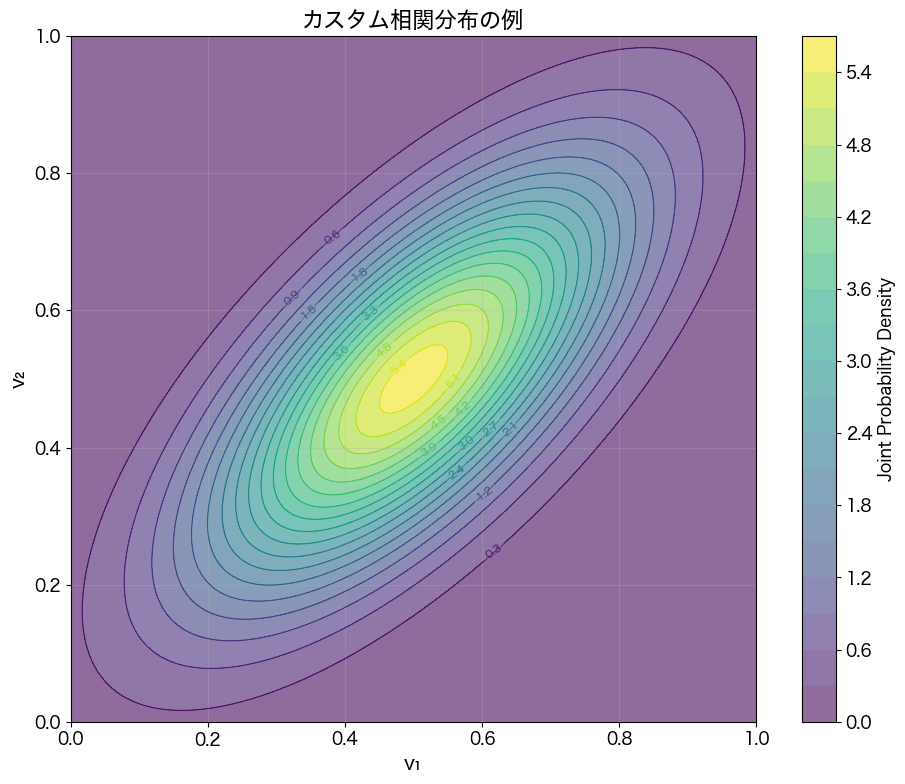

In [96]:
# カスタム同時PDF関数を使用する例
# 例: 相関のあるGamma分布のような分布（カスタム関数）

def custom_correlated_pdf(points):
    """
    カスタムの相関のある同時PDF関数の例
    ここでは、2変量正規分布をベースにした例を示しますが、
    任意の同時PDF関数を定義できます。
    """
    # この例では、実際には多変量正規分布を使用
    mean = np.array([0.5, 0.5])
    std1, std2 = 0.2, 0.2
    corr = 0.7
    cov = np.array([
        [std1**2, corr * std1 * std2],
        [corr * std1 * std2, std2**2]
    ])
    mvn = stats.multivariate_normal(mean=mean, cov=cov)
    return mvn.pdf(points)

plot_2d_correlated_contour(
    joint_pdf_func=custom_correlated_pdf,
    x_range=(0, 1), y_range=(0, 1),
    x_label='v₁', y_label='v₂',
    title='カスタム相関分布の例',
    show_stats=False
)

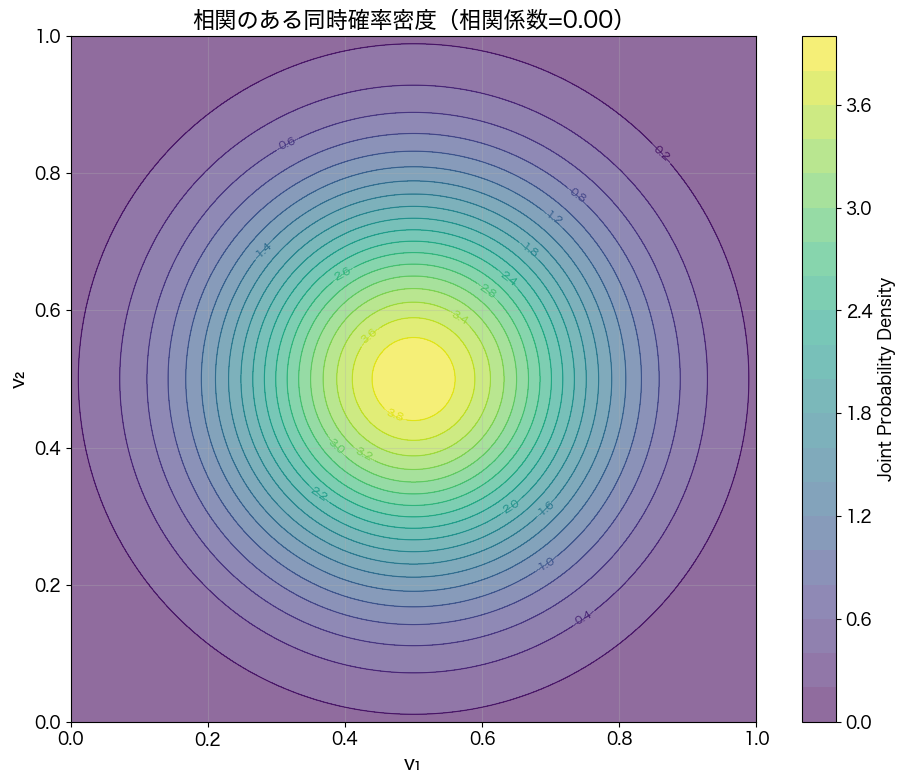

平均: [0.5000, 0.5000]
標準偏差: [0.2000, 0.2000]
相関係数: 0.0000


In [97]:
# 相関係数 = 0.0（独立）
plot_2d_correlated_contour(
    dist_type='multivariate_normal',
    dist_params={
        'mean': [0.5, 0.5],
        'std': [0.2, 0.2],
        'corr': 0.0
    },
    x_range=(0, 1), y_range=(0, 1),
    x_label='v₁', y_label='v₂'
)


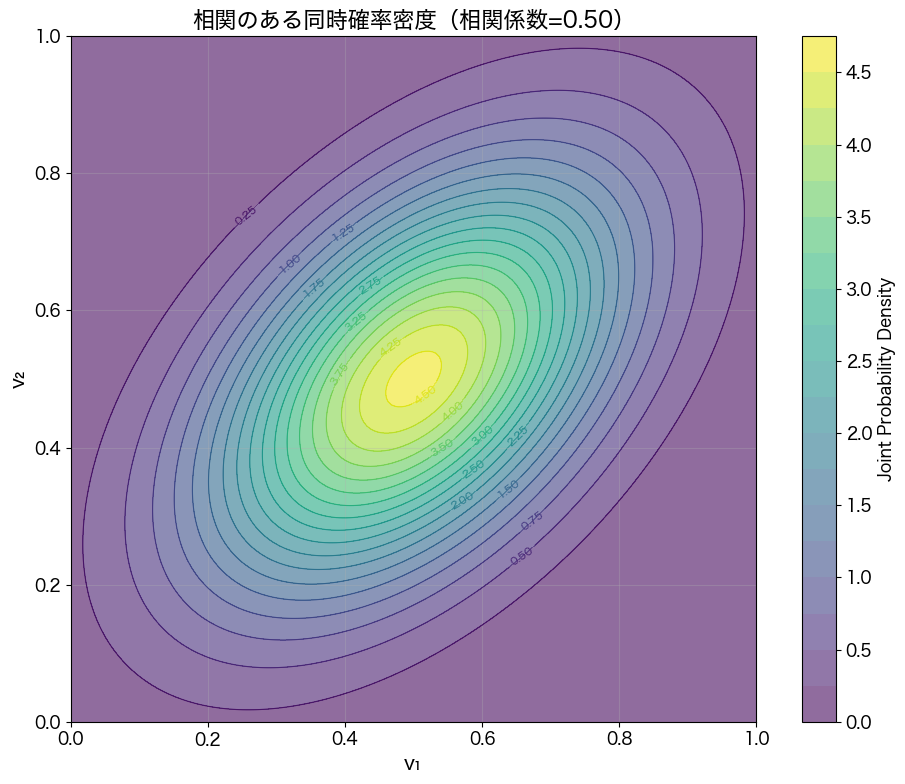

平均: [0.5000, 0.5000]
標準偏差: [0.2000, 0.2000]
相関係数: 0.5000


In [98]:
# 相関係数 = 0.5（正の相関）
plot_2d_correlated_contour(
    dist_type='multivariate_normal',
    dist_params={
        'mean': [0.5, 0.5],
        'std': [0.2, 0.2],
        'corr': 0.5
    },
    x_range=(0, 1), y_range=(0, 1),
    x_label='v₁', y_label='v₂'
)


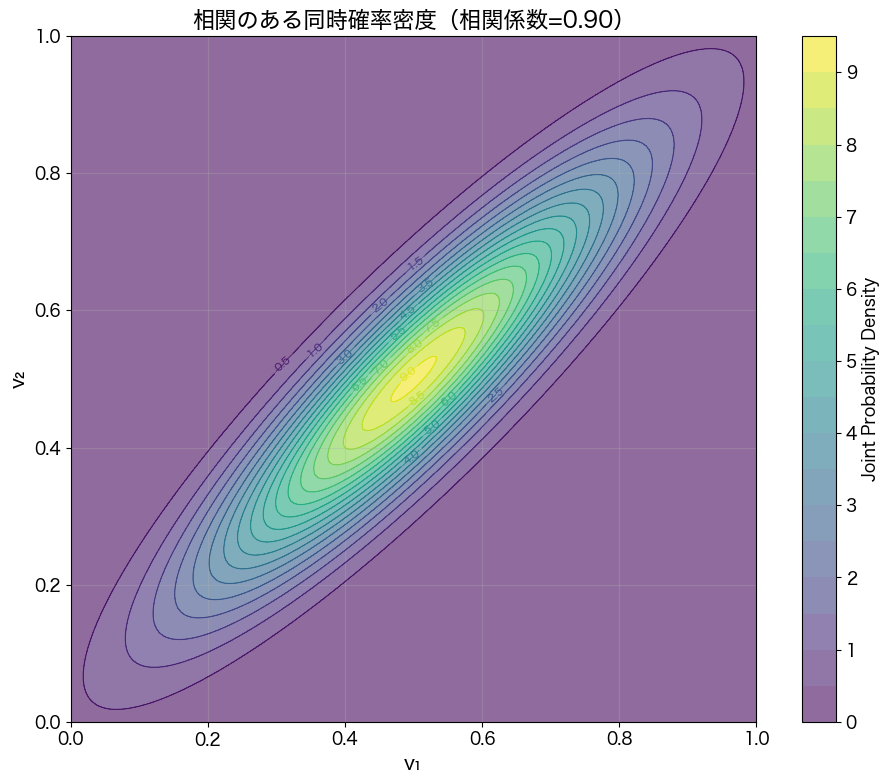

平均: [0.5000, 0.5000]
標準偏差: [0.2000, 0.2000]
相関係数: 0.9000


In [99]:
# 相関係数 = 0.9（強い正の相関）
plot_2d_correlated_contour(
    dist_type='multivariate_normal',
    dist_params={
        'mean': [0.5, 0.5],
        'std': [0.2, 0.2],
        'corr': 0.9
    },
    x_range=(0, 1), y_range=(0, 1),
    x_label='v₁', y_label='v₂'
)


In [ ]:
# 相関係数 = -0.5（負の相関）
plot_2d_correlated_contour(
    dist_type='multivariate_normal',
    dist_params={
        'mean': [0.5, 0.5],
        'std': [0.2, 0.2],
        'corr': -0.5
    },
    x_range=(0, 1), y_range=(0, 1),
    x_label='v₁', y_label='v₂'
)


In [ ]:
# 相関係数 = -0.9（強い負の相関）
plot_2d_correlated_contour(
    dist_type='multivariate_normal',
    dist_params={
        'mean': [0.5, 0.5],
        'std': [0.2, 0.2],
        'corr': -0.9
    },
    x_range=(0, 1), y_range=(0, 1),
    x_label='v₁', y_label='v₂'
)


In [ ]:
# 共分散行列を直接指定する方法
plot_2d_correlated_contour(
    dist_type='multivariate_normal',
    dist_params={
        'mean': [0.5, 0.5],
        'cov': [[0.04, 0.02], [0.02, 0.04]]  # 相関係数 = 0.5
    },
    x_range=(0, 1), y_range=(0, 1),
    x_label='v₁', y_label='v₂'
)
